
Fresnel_Reflection_main.py



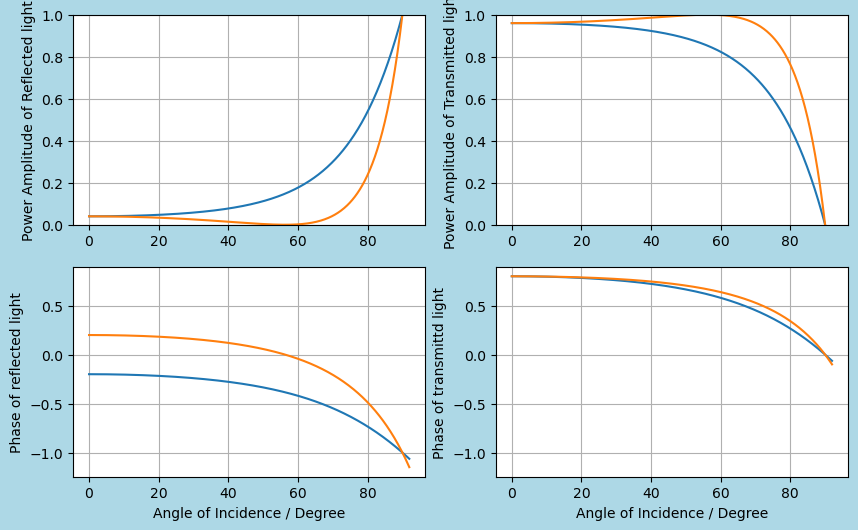

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import Fresnel_Reflection_atg_def

if __name__ == '__main__':
    param = 0.001
    m = 512

theta1col, theta2col, rscol, tscol, rpcol, tpcol, PRscol, PTscol, PRpcol, PTpcol = Fresnel_Reflection_atg_def.proc1(param,m)

print('')
print('Fresnel_Reflection_main.py')
print('')

fig = plt.figure(figsize = (10,6), facecolor='lightblue')


ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharey=ax1)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4, sharey=ax3)

ax1.plot(theta1col,PRscol,theta1col,PRpcol)
ax1.set_ylabel("Power Amplitude of Reflected light")
ax1.set_ylim(0,1)
ax1.grid()

ax2.plot(theta1col,PTscol,theta1col,PTpcol)
ax2.set_ylabel("Power Amplitude of Transmitted light")
ax2.set_ylim(0,1)
ax2.grid()

ax3.plot(theta1col,rscol,theta1col,rpcol)
ax3.set_xlabel("Angle of Incidence / Degree")
ax3.set_ylabel("Phase of reflected light")
ax3.grid()

ax4.plot(theta1col,tscol,theta1col,tpcol)
ax4.set_xlabel("Angle of Incidence / Degree")
ax4.set_ylabel("Phase of transmittd light")
ax4.grid()

plt.show()